## Handwritten Digits Generation

Copyright (c) 2023 Institute for Quantum Computing, Baidu Inc. All Rights Reserved.

### Generation Model

The generation model is a vital model type in machine learning, which is used to generate data that conforms to some distribution. Generally speaking, the generation model can learn the distribution characteristics of data from some training data and generate new data according to these characteristics.

Generation models can be divided into probabilistic generation models and non-probabilistic generation models. The probabilistic generation model refers to the generation model that can build the probability distribution model of data, such as the common Gaussian mixed model, naive Bayesian model, etc. These models can usually be trained by maximum likelihood estimation, and then generate new data according to these models that conforms to the data distribution. The non-probabilistic generation model refers to that it does not rely on the probability distribution model, but directly generates new data by learning the characteristics and laws of the data. For example, the generative adversarial network (GAN) is a non-probabilistic generation model. It learns to generate data through the confrontation of two neural networks.

Generation models have been widely used in natural language processing, image processing, audio processing and other fields. For example, you can use the generation model to generate natural language text, images, audio and other content. You can also use the generation model to perform tasks such as image and audio noise reduction, style conversion, etc.

### Generation of MNIST Handwritten Digital Images Using QCAAN Model

#### Brief Introduction of QCAAN

Quantum-Circuit Associative Adversarial Network (QCAAN) [<sup>1</sup>](#qcaan_ref) is a quantum generation model,
which is able to learn from existing data to generate more realistic new data. It can be applied to data generation, data expansion and unsupervised learning.

The model is mainly designed based on Generative Adversarial Network (GAN). GAN is a type of deep learning model that consists of two neural networks: the Generator and the Discriminator. The Generator generates fake samples by taking noise samples from Gaussian distribution as input, while the discriminator classifies real and fake samples. The two networks compete with each other and are continuously optimized to make the generated samples more realistic.

In this model, the Gaussian noise input in the classical generative adversarial network (GAN) is replaced by the quantum state distribution described by the parameterized quantum circuit. Refer to the figure below for the model details. Except for the two networks in a GAN, we need to train a third network (QNN) to depict the input prior of the Generator, and make it close to the latent space distribution of the second-last layer of the Discriminator. In this model, our employed QNN mainly contains several layers of U3 gates and strongly entangled gates. A quantum circuit with n qubits and D layers can be simply implemented by using the following Paddle-Quantum codes:

```code
cir = paddle_quantum.ansatz.Circuit(n)
cir.complex_entangled_layer(D)
```

#### Advantages of QCAAN 

- Compared to classical (pseudo) Gaussian distribution, quantum state distrition is truly random, which can solve the kick-start problem of the Generator.
- The authors [<sup>1</sup>](#qcaan_ref) claimed that the quantum state distribution helps to stabilize the GAN, which would cause the GAN to generate both higher quality and more diverse images.

<!--![alt 量子电路关联对抗网络](qcaan_model.png "量子电路关联对抗网络")-->

<center>
    <img style="border-radius: 0.3125em;
    box-shadow: 0 2px 4px 0 rgba(34,36,38,.12),0 2px 10px 0 rgba(34,36,38,.08);" 
    src="qcaan_model.png">
    <br>
    <div style="color:orange; border-bottom: 1px solid #d9d9d9;
    display: inline-block;
    color: #999;
    padding: 2px;">Figure of Quantum Circuit Associative Adversarial Network<sup>1</sup>. On the right are two networks of GAN: Generator and Discriminator. On the left is a quantum neural network used to characterize prior distribution. During training, the three networks are alternatively trained; during inference, samples are first taken from the quantum neural network and then fed into the generator to generate realistic images.</div>
</center>





### How to Use

#### Use QCAAN to Infer

Here, we provide an trained model, which can directly generate handwritten digits. Just enter the following command
```code
python qcaan_generation.py --config inference.toml 
```


#### Online Demo
First define the contents of the configuration file inference.toml:

In [3]:
inference_toml = r"""
# The full config of the QC-AAN model.
# The mode of this config. Available values: 'train' | 'inference'. Here we choose 'inference'.
# mode = 'inference'
# The name of the model, which is used to save the model.
# model_name = 'qcaan-model'
# The path to load the parameters of the trained model. Both relative and absolute paths are allowed.
params_path = "params"
# The number of qubits which the quantum circuit contains.
num_qubits = 8
# The number of depths of complex entangled layers which the quantum circuit contains.
num_depths = 4
# latent feature numbers which represents the input dimension of the generator.
latent_dim = 16
# The manual seed for reproducibility.
manual_seed = 20230313
"""

Next is the code for genenration.

Each time we first randomly sample 60 samples (note that 0,1 strings are scaled to 1,-1 strings) from the trained quantum state distribution, then feed them to the Generator to generate 60 new images. We also randomly select 40 original MNIST images as comparison. If you want to change a batch of new images, you could modify the manual_seed in the last line of the above file inference.toml.



This program is running on your cpu!

Model loaded, generating new images...
The first 10 QNN samples are listed below:
 [[ 1.  1.  1. -1.  1.  1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1.]
 [ 1.  1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1.]
 [ 1.  1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1.]
 [ 1.  1.  1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.]
 [-1.  1.  1.  1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1.]
 [ 1.  1.  1. -1.  1. -1. -1.  1.  1. -1.  1. -1. -1. -1.  1.  1.]
 [-1. -1.  1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1.]
 [ 1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.]
 [-1. -1. -1.  1.  1. -1. -1. -1.  1.  1. -1. -1.  1. -1.  1. -1.]]

The generated pictures are saved to the file named 'gen_pics/qcaan_generated_vs_original_20230313.png'.



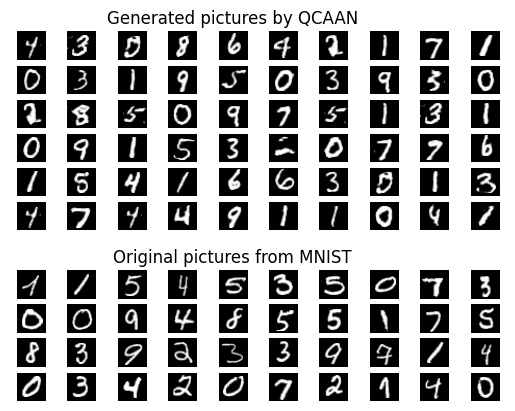

In [4]:
import os
import warnings

warnings.filterwarnings('ignore')
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

import toml
from paddle_quantum.qml.qcaan import model_test

config = toml.loads(inference_toml)
model_test(**config)


### Note
- Here we only give the trained model. If you want to retrain this model, just enter the command
```code
python qcaan_generation.py --config train.toml 
```
You can also modify the file train.toml to set different training parameters.
- If you want to change a dataset to test model, you need to view the source code file ./paddle_quantum/qml/qcaan.py, and modify the data loading part. You may also need to modify slightly the model network architectures and hyper-parameters, etc.


### References

<div id="qcaan_ref"></div>

- [1] Rudolph, Manuel S., et al. "Generation of high-resolution handwritten digits with an ion-trap quantum computer." Physical Review X 12.3 (2022): 031010.